In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
fashion_mnist_label = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

In [ ]:
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
def create_model(learning_rate):
  models = tf.keras.Sequential()
  models.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(w, h, 1)))
  models.add(tf.keras.layers.MaxPooling2D((2, 2)))
  models.add(tf.keras.layers.Dropout(0.3))

  models.add(tf.keras.layers.Conv2D(filters = 32, kernel_size=2, padding='same', activation='relu'))
  models.add(tf.keras.layers.MaxPooling2D((2, 2)))
  models.add(tf.keras.layers.Dropout(0.3))

  models.add(tf.keras.layers.Flatten())
  models.add(tf.keras.layers.Dense(128, activation='relu'))
  models.add(tf.keras.layers.Dropout(0.5))
  models.add(tf.keras.layers.Dense(10, activation='softmax'))

  models.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                loss="categorical_crossentropy",
                metrics=['accuracy'])
  return models


In [ ]:
def plot_curve(epochs, hist, list_of_metrics):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


In [ ]:
learning_rate = 0.0045
epochs = 20
batch_size = 64

my_model = create_model(learning_rate)

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
my_model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_valid, y_valid),callbacks=[checkpointer])

Epoch 1/20
859/860 [============================>.] - ETA: 0s - loss: 0.5957 - accuracy: 0.7821
Epoch 1: val_loss improved from inf to 0.37180, saving model to model.weights.best.hdf5
860/860 [==============================] - 55s 59ms/step - loss: 0.5957 - accuracy: 0.7821 - val_loss: 0.3718 - val_accuracy: 0.8592
Epoch 2/20
  3/860 [..............................] - ETA: 28s - loss: 0.4243 - accuracy: 0.8125

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


860/860 [==============================] - ETA: 0s - loss: 0.4521 - accuracy: 0.8349
Epoch 2: val_loss improved from 0.37180 to 0.32136, saving model to model.weights.best.hdf5
860/860 [==============================] - 37s 44ms/step - loss: 0.4521 - accuracy: 0.8349 - val_loss: 0.3214 - val_accuracy: 0.8860
Epoch 3/20
859/860 [============================>.] - ETA: 0s - loss: 0.4258 - accuracy: 0.8426
Epoch 3: val_loss improved from 0.32136 to 0.31061, saving model to model.weights.best.hdf5
860/860 [==============================] - 39s 46ms/step - loss: 0.4259 - accuracy: 0.8426 - val_loss: 0.3106 - val_accuracy: 0.8880
Epoch 4/20
860/860 [==============================] - ETA: 0s - loss: 0.4011 - accuracy: 0.8515
Epoch 4: val_loss improved from 0.31061 to 0.29387, saving model to model.weights.best.hdf5
860/860 [==============================] - 37s 43ms/step - loss: 0.4011 - accuracy: 0.8515 - val_loss: 0.2939 - val_accuracy: 0.8888
Epoch 5/20
860/860 [============================

In [ ]:
my_model.load_weights('model.weights.best.hdf5')

In [ ]:
score = my_model.evaluate(x_test, y_test, verbose=0)

print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8955000042915344


313/313 [==============================] - 2s 7ms/step


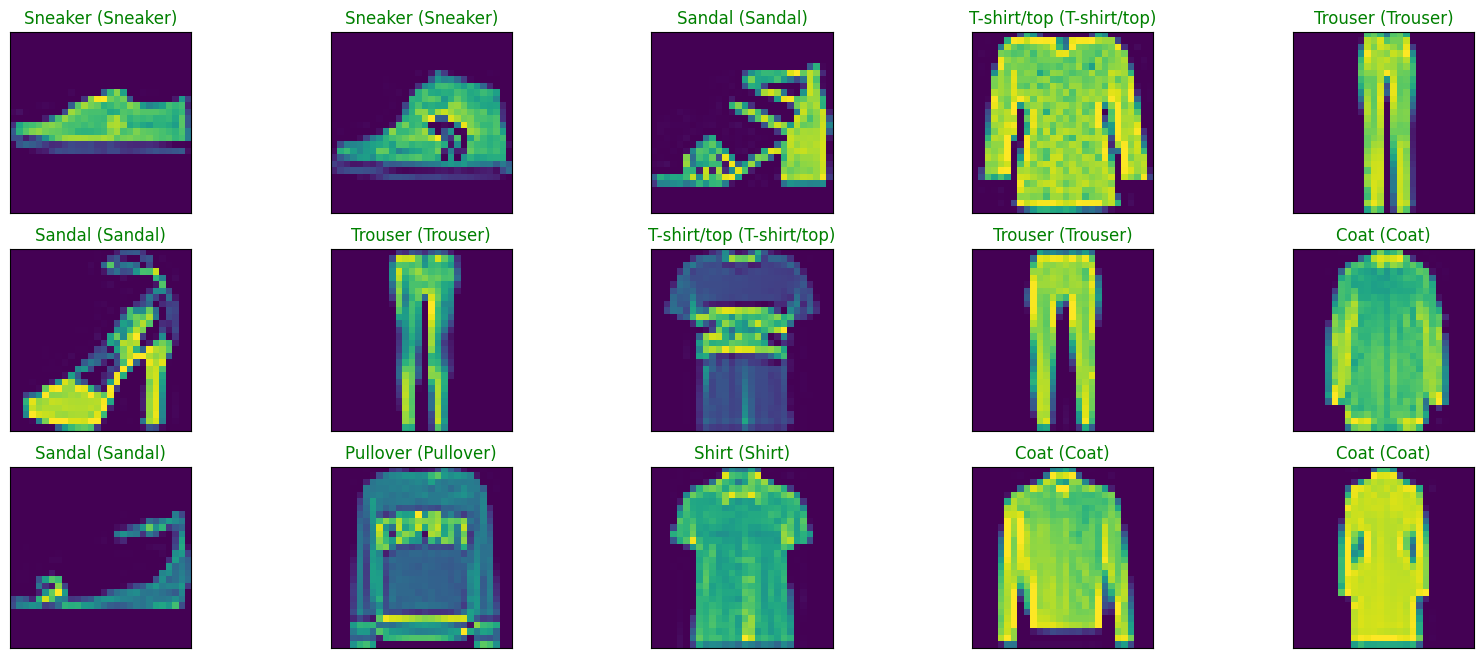

In [ ]:
y_hat = my_model.predict(x_test)

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    ax.set_title("{} ({})".format(fashion_mnist_label[predict_index],
                                  fashion_mnist_label[true_index]),
                                  color=("green" if predict_index == true_index else "red"))